In [66]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns

In [76]:
logsDir = 'logs/cifar100_resnet50_adam_v6/20200606-150929'
folderList = ['train', 'validation']

tagList = ["loss", "accuracy"]
logDF = pd.DataFrame()

for folder in folderList:

    logFile = os.listdir(os.path.join(logsDir, folder))[0]
    logFile = os.path.join(logsDir, folder, logFile)
    logList = []

    for idx, e in enumerate(tf.compat.v1.train.summary_iterator(logFile)):
        for v in e.summary.value:
            if any(tag in v.tag for tag in tagList):
                r = {'dataset':folder, 'metric': v.tag, 'value':v.simple_value}
                logList.append(r)
    
    tempDF = pd.DataFrame(logList)
    nEpochs = int(len(logList)/2)
    epochList= [item for sublist in [[i]*2 for i in range(0,nEpochs)] for item in sublist]
    tempDF['epoch'] = epochList
    
    logDF = logDF.append(tempDF)

#print([item for sublist in [[i]*2 for i in range(0, len(logList)//5)] for item in sublist])
logDF.head()

,dataset,metric,value,epoch
0,train,epoch_loss,4.302042,0
1,train,epoch_accuracy,0.113700,0
2,train,epoch_loss,3.568005,1
3,train,epoch_accuracy,0.230880,1
4,train,epoch_loss,3.100625,2


In [77]:
pivotDF = pd.pivot_table(logDF, values='value', index=['epoch', 'dataset'],
                            columns=['metric'], aggfunc=np.sum)

pivotDF.reset_index(inplace=True)
pivotDF.head()

metric,epoch,dataset,epoch_accuracy,epoch_loss
0,0,train,0.11370,4.302042
1,0,validation,0.16950,3.911515
2,1,train,0.23088,3.568005
3,1,validation,0.24180,3.503273
4,2,train,0.31652,3.100625


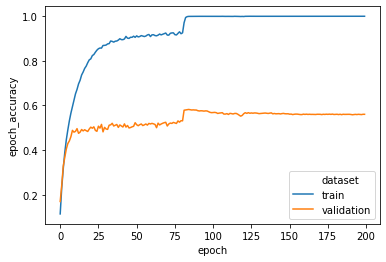

In [78]:
sns.lineplot(x="epoch", y="epoch_accuracy", hue="dataset", data=pivotDF)